# Starting example

In case you would like to train visually a decision tree yourself with the use of Python

In [1]:
# Loading libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating our dataset
points = np.concatenate((np.random.multivariate_normal([5, 7], [[3, -3], [-3, 7]], 50).T,
                         np.random.multivariate_normal([-2, 8], [[5, -1], [-1, 4]], 50).T,
                         np.random.multivariate_normal([0, 2], [[3, -3], [-3, 7]], 50).T,
                         np.random.multivariate_normal([5, 0], [[5, -1], [-1, 4]], 50).T), axis=1)

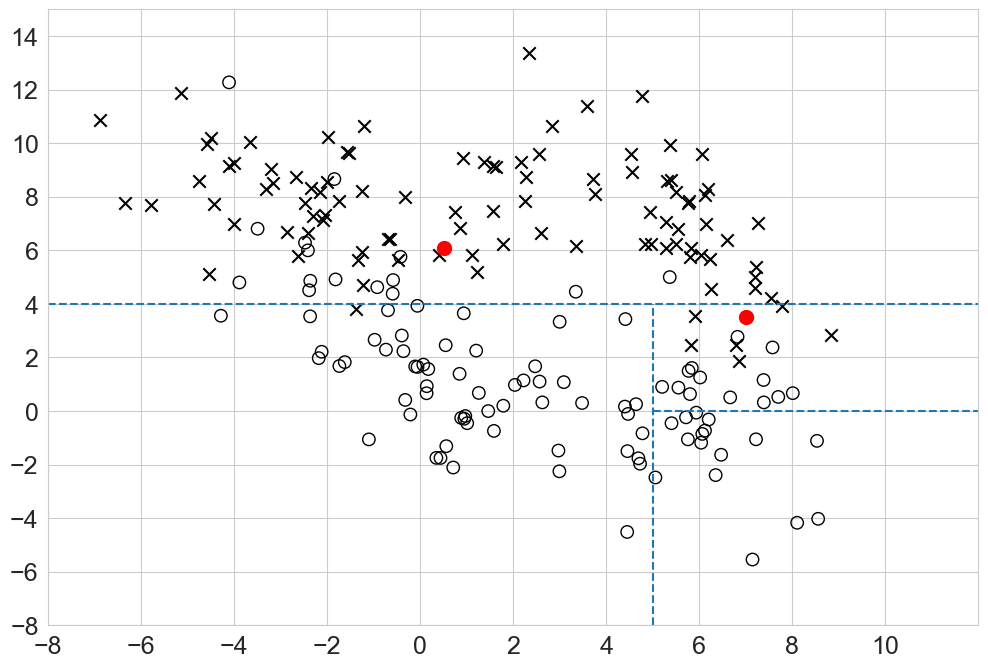

In [3]:
# Creating our plot
fig, ax = plt.subplots(figsize=(12, 8))

# scatter rysuj wykres z punktów wygenerowanych wyżej
# :100 do setki
# 100: od setki
ax.scatter(points[0,:100], points[1,:100], s=80, marker='x', color='black')
ax.scatter(points[0,100:], points[1,100:], s=80, facecolors='none', edgecolors='black')

plt.xlim(-8,12)
plt.ylim(-8,15)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.set_xticks([-8,-6,-4,-2,0,2,4,6,8,10])
ax.set_yticks([-8,-6,-4,-2,0,2,4,6,8,10,12,14])

# Adding segments to indicate splits
plt.hlines(y=4, xmin=-8, xmax=15, linestyles='dashed')
plt.vlines(x=5, ymin=-8, ymax=4, linestyles='dashed')
plt.hlines(y=0, xmin=5, xmax=15, linestyles='dashed')

# Checking to which classes those (new) observations will be assigned
ax.scatter(0.5, 6.1, s=100, edgecolors='red', facecolors='red')
ax.scatter(7, 3.5, s=100, edgecolors='red', facecolors='red')

plt.show()

# Starting code snippet

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
# Loading data
data = pd.read_csv('train.csv') #Please remember to use correct path to your train file!
# Dropping missing data
data.dropna(inplace=True)

In [6]:
# Checking how our data looks like
inputs = data.loc[:, ['Survived','Pclass']]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [7]:
# Creating an instance of our decision tree
tree = DecisionTreeClassifier(max_depth = 10, random_state = 0)
# Training, aka fitting our model to the data
tree.fit(inputs, data.Survived)
predictions = tree.predict(inputs)

In [8]:
# Reading the confusion matrix (https://en.wikipedia.org/wiki/Confusion_matrix)
confusion_matrix(data.Survived, predictions)

array([[ 60,   0],
       [  0, 123]], dtype=int64)

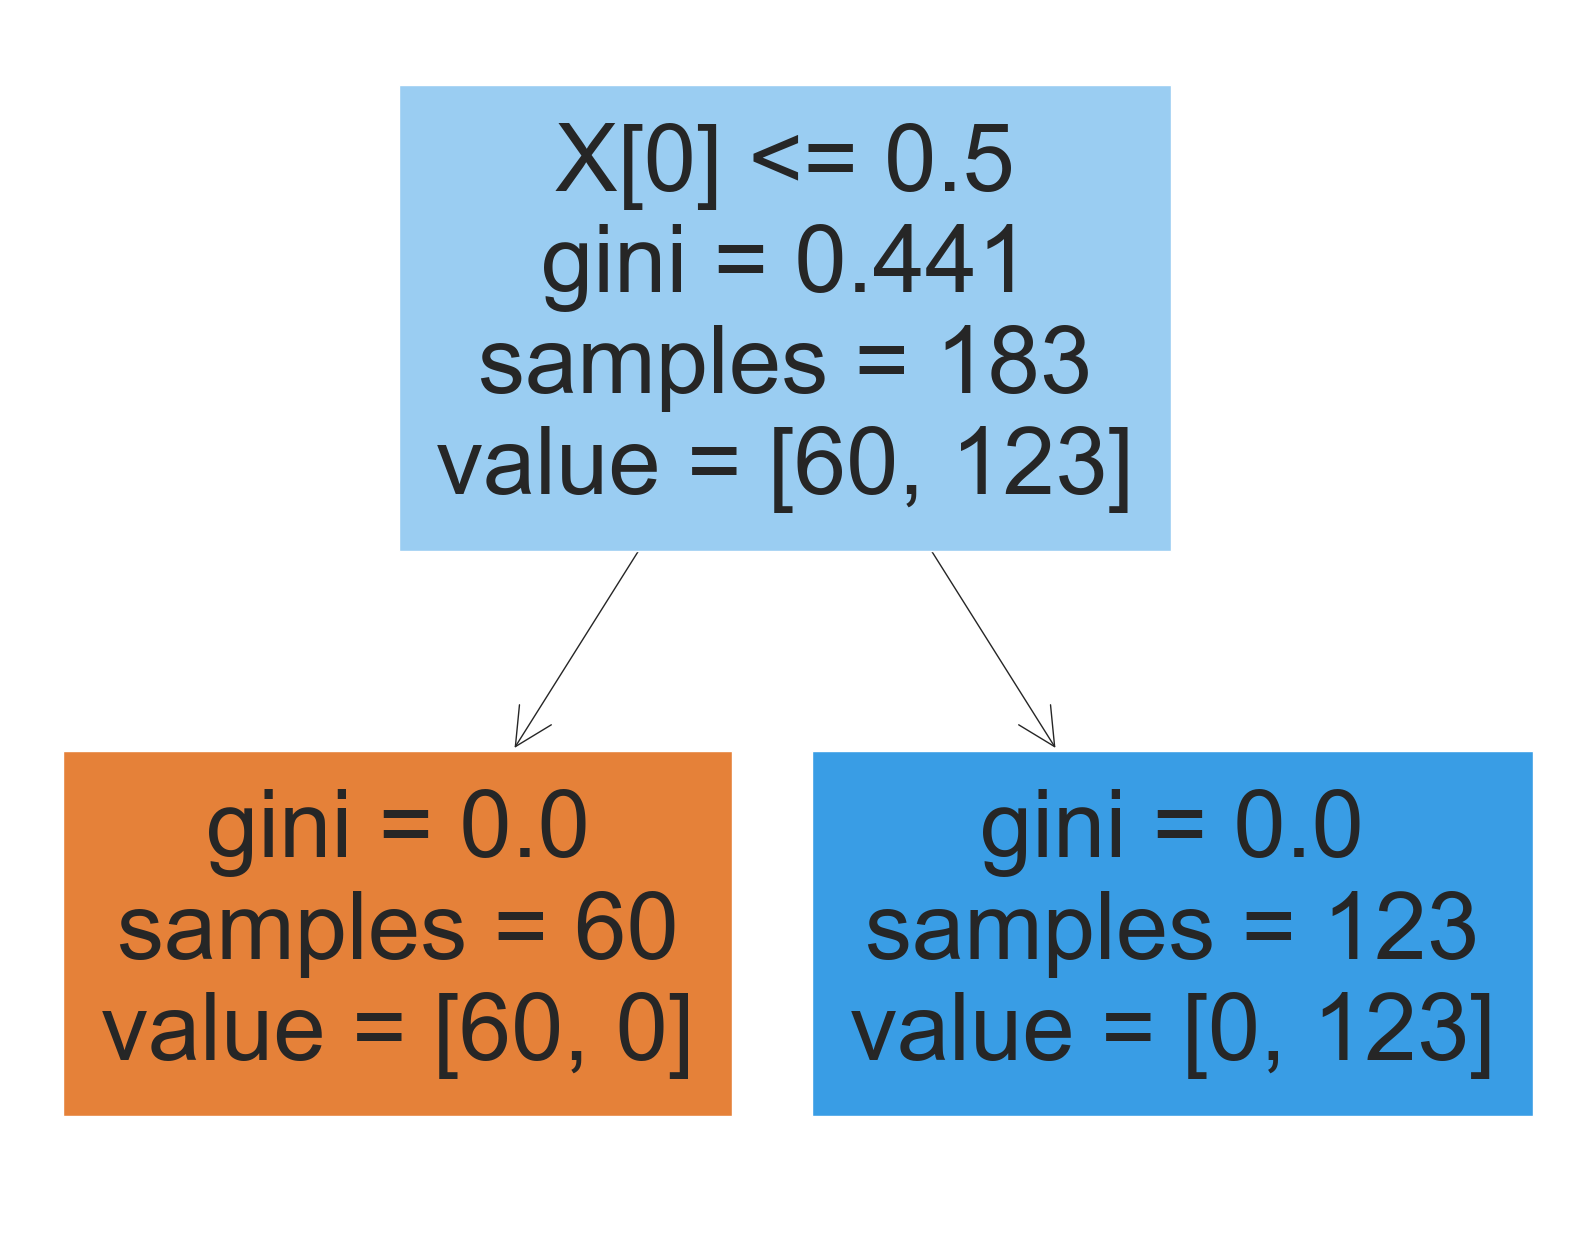

In [11]:
# Creating a plot of our model
plt.subplots(figsize=(20, 16))
plot_tree(tree, filled=True)
plt.show()